We will use sample data after tokenizing and PCA to train model and see how it performs. We will also choose Light GBM, and linear regression.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

vect_df_train_sample = pd.read_csv('../data/vect_train_data_sample.csv')
vect_df_val_sample = pd.read_csv('../data/vect_val_data_sample.csv')
vect_df_test_sample = pd.read_csv('../data/vect_test_data_sample.csv')

print(vect_df_train_sample.shape)
print(vect_df_val_sample.shape)
print(vect_df_test_sample.shape)

(3224, 43)
(913, 43)
(913, 43)


In [2]:
X_train = vect_df_train_sample.drop(columns=['totalRent']).values
y_train = vect_df_train_sample['totalRent'].values
print(X_train.shape)
print(y_train.shape)

(3224, 42)
(3224,)


In [3]:
X_val = vect_df_val_sample.drop(columns=['totalRent']).values
y_val = vect_df_val_sample['totalRent'].values
print(X_val.shape)
print(y_val.shape)

(913, 42)
(913,)


In [4]:
X_test = vect_df_test_sample.drop(columns=['totalRent']).values
y_test = vect_df_test_sample['totalRent'].values
print(X_test.shape)
print(y_test.shape)

(913, 42)
(913,)


In [5]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [6]:
# Model evaluation
def model_evaluation(estimator, X, y):
    predicted_values = estimator.predict(X)
    MSELoss = mean_squared_error(predicted_values, y)
    RMSELoss = np.sqrt(MSELoss)
    r2score = r2_score(predicted_values, y)
    print("RMSE loss: ", RMSELoss)
    print("R2 score: ", r2score)
    return predicted_values

# Cross validation
def cross_validation(estimator, X, y, score = 'r2', n = 5):
    validate = cross_val_score(estimator, X, y, scoring = score, cv = n)
    print("Mean valiation R2 score: ", validate.mean())

# Histplot of the residuals
def histplot(residuals):
    sns.histplot(
        data=residuals,
        kde=True,
        color='red'
    )

# Plot the residuals
def plot(residuals):
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(residuals)), residuals, color='blue') 
    plt.xlabel('Index')
    plt.ylabel('Residuals')
    plt.show()

# Hypertunning
def hyper_tune(estimator, X, y, param_grid, score = 'r2', n = 5):
    grid_search = GridSearchCV(
        estimator=estimator,
        param_grid=param_grid,
        scoring=score,
        cv=n
    )
    grid_search.fit(X, y)
    best_score = grid_search.best_score_
    print("Best R2 score: ", best_score)
    # Add this line if we wish to return the best_degree for polynomial features
    # And remember to return best_degree
    # best_degree = grid_search.best_params_['poly_feat__degree']
    return grid_search.best_estimator_

In [7]:
from lightgbm import LGBMRegressor

clf = LGBMRegressor(num_leaves=31)
cross_validation(clf, X_train, y_train)

Mean valiation R2 score:  0.8242055783536293


In [8]:
clf.fit(X_train, y_train)

LGBMRegressor()

In [9]:
y_val_pred = model_evaluation(clf, X_val, y_val)

RMSE loss:  178.77777925770843
R2 score:  0.8391431043202959


In [10]:
y_test_pred = model_evaluation(clf, X_test, y_test)

RMSE loss:  203.95970135020778
R2 score:  0.8334517571505489


In [11]:
lst = vect_df_train_sample.drop(columns=['totalRent']).columns.to_list()

def get_important_features(clf, top_n):
    
    # Get feature importances
    importance = clf.feature_importances_

    # Get indices of sorted importances
    sorted_indices = np.argsort(importance)[::-1]
    
    top_n_features = [lst[index] for index in sorted_indices[:top_n]]
    print(f"Top {top_n} important features: ", top_n_features)

    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sorted_indices)), importance[sorted_indices], align='center')
    plt.yticks(range(len(sorted_indices)), importance)
    plt.xlabel("Feature Importance")
    plt.title("Feature Importances in Regressor Model")
    plt.gca().invert_yaxis()  # Invert y-axis to have the most important at the top
    plt.show()

Top 10 important features:  ['livingSpace', 'serviceCharge', 'pricetrend', 'geo_plz', 'regio2', 'yearConstructed', 'description_vec_3', 'description_vec_8', 'facilities_vec_1', 'description_vec_6']


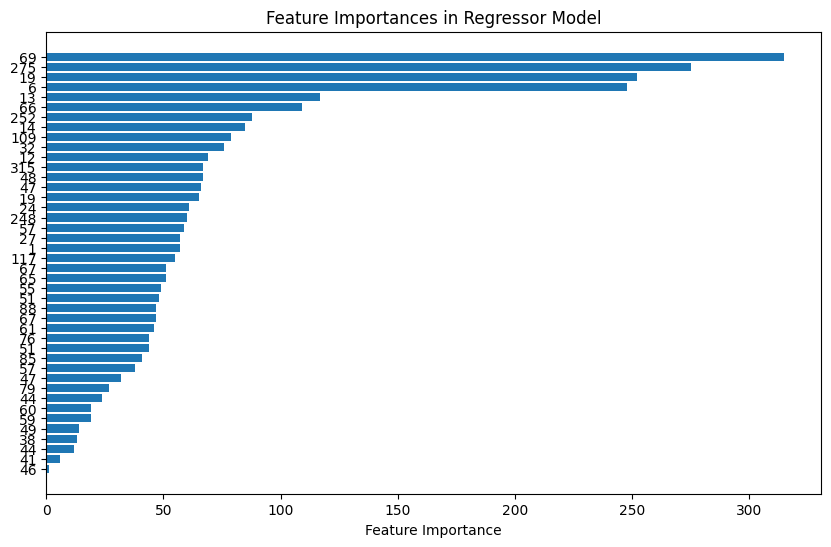

In [12]:
get_important_features(clf, 10)

New important features are extracted!!!